<H1><center>WORDCLOUD GENERATION USING PYTHON

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

## STEP 1 : IMPORT ALL REQUIRED MODULES 

In [1]:
import nltk;                                 #for performing natural language processing                       
from nltk.corpus import stopwords; 
from nltk.tokenize import word_tokenize;
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import numpy as np                           #for handling multi-dimensional arrays and matrices 
import pandas as pd          
from PIL import Image                        #for image reading, used in masking
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plot              #for plotting wordcloud
import re

## STEP 2 : READ TEXT FILE

In [2]:
#function to read the text file whose wordcloud is to be formed 
def open_file(fname):
    file_content = open(fname)
    return file_content

## STEP 3 : TEXT PREPROCESSING
Preprocessing is required for transferring text from human language to machine-readable format for further processing. This includes several tools:
- converting all letters to lower or upper case
- lemmatization
- removing numbers
- removing punctuations, accent marks and other diacritics
- removing white spaces
- expanding abbreviations
- removing stop words, sparse terms, and particular words
- text canonicalization

I have used few of these tools, rest can be done in similar way.

In [3]:
#Function to preprocess the text
def preprocess_text(text):
    #removing numbers
    text = re.sub(r'\d+', '', text)
    
    #converting to lower case
    text = text.lower()
    
    #removing puntuations
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(text);
    
    #lemmatization
    lemmatizer = WordNetLemmatizer()
    for word in word_tokens:
        word = lemmatizer.lemmatize(word)
    
    #removing stop words
    stop_words = set(stopwords.words('english')) 
    filtered_text = [word for word in word_tokens if not word in stop_words] 

    text=''
    for words in filtered_text : 
        text += words + ' '
    return text                          #final preprocessed text

## STEP 4 : GENERATE WORDCLOUD
After getting the normalised text, we are ready to create our wordcloud. Let's create and display our very own Wordcloud !

In [4]:
#function to generate wordcloud of the normalized text
def generate_wordcloud(wc_name,text):
    #WordCloud(max_font_size=50, max_words=500, background_color="white", )
    wordcloud = WordCloud().generate(text)
    
    #save the wordcloud to png file
    wordcloud.to_file("Images/"+ wc_name +"_wordcloud.png")
    return wordcloud

In [5]:
#function to plot wordcloud 
def display_wordcloud(wordcloud):
    plot.imshow(wordcloud, interpolation='bilinear')
    plot.axis("off")
    plot.show()

## STEP 5 :  DRIVER CODE

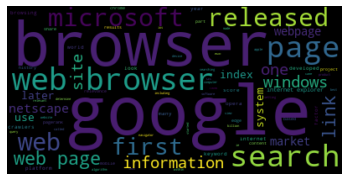

In [6]:
#Driver code to call all the methods
'''
    INPUT  : Desired text file and name of the wordcloud
    OUTPUT : Display wordcloud image
'''

wc_name = 'merged_text'                          #name of the wordcloud
fname = 'Texts/merged_file.txt'                  #name of the text file whose wordcloud is to be generated
mask = 'Masks/cloud_mask.png'
file_content = open_file(fname)
text = file_content.read()

#TEXT PREPROCESSING
normalised_text = preprocess_text(text)

#GENERATE WORDCLOUD
wordcloud = generate_wordcloud(wc_name, normalised_text)

#DISPLAY THE WORDCLOUD
display_wordcloud(wordcloud)

## STEP 6 :  MASKED CLOUD
We can create wordclouds of any desired shape or color. Let's do it..

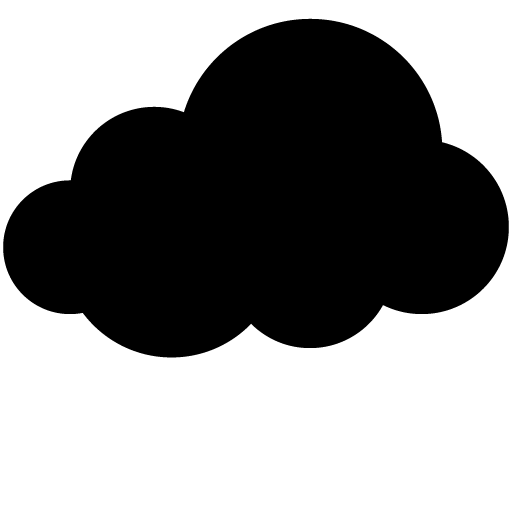

In [7]:
Image.open("Masks/cloud_mask.png")

In [8]:
mask = np.array(Image.open("Masks/cloud_mask.png"))
mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

The way the masking functions works is that it requires all white part of the mask should be 255 (integer type). This value represents the "intensity" of the pixel. Values of 255 are pure white, whereas values of 1 are black. We need to transform all 0 to 255

In [9]:
def transform_format(val):
    #all white part of the mask should be 255 
    if val[3] == 0:
        return 255
    else:
        return 0

Now, we need to create a new mask with the same shape as the mask we have and apply the function transform_format() to each value in each row of the previous mask.

In [10]:
transformed_mask = np.ndarray((mask.shape[0], mask.shape[1]), np.int32)

for i in range(len(mask)):
    for j in range(len(mask[i])):
        transformed_mask[i][j] = transform_format(mask[i][j])


In [11]:
transformed_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [12]:
def generate_masked_wordcloud(wc_name,text,mask):
    wordcloud = WordCloud(mask = mask, contour_width=5, background_color="white", contour_color='black').generate(text)
   
    #save the wordcloud to png file
    wordcloud.to_file("Images/"+ wc_name + "_wordcloud.png")
    return wordcloud

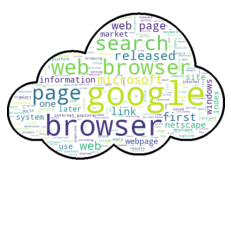

In [13]:
wordcloud = generate_masked_wordcloud(wc_name, normalised_text,transformed_mask)
display_wordcloud(wordcloud)